In [44]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import 
from skimage import metrics

SyntaxError: Expected one or more names after 'import' (4139548984.py, line 5)

Data Collection and Processing

In [ ]:
car_dataset = pd.read_csv(r"C:\Users\matam\Downloads\archive\car data.csv")


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding The Categorical Data

In [ ]:
car_datacar_dataset.replace({'fuel_Type':{'Petrol':0,'Disel':1,'CNG':2}},inplace=True)
car_datacar_dataset.replace({'Seller_Type':{'Dealer':0,'Inndividual':1}},inplace=True)
car_datacar_dataset.replace({'Trasmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Spliting the data and Traget

In [ ]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000    Petrol      Dealer       Manual      0
1    2013           9.54       43000    Diesel      Dealer       Manual      0
2    2017           9.85        6900    Petrol      Dealer       Manual      0
3    2011           4.15        5200    Petrol      Dealer       Manual      0
4    2014           6.87       42450    Diesel      Dealer       Manual      0
..    ...            ...         ...       ...         ...          ...    ...
296  2016          11.60       33988    Diesel      Dealer       Manual      0
297  2015           5.90       60000    Petrol      Dealer       Manual      0
298  2009          11.00       87934    Petrol      Dealer       Manual      0
299  2017          12.50        9000    Diesel      Dealer       Manual      0
300  2016           5.90        5464    Petrol      Dealer       Manual      0

[301 rows x 7 columns]


In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Spliting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


lin_reg_model = LinearRegression()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load data
data = pd.read_csv(r"C:\Users\matam\Downloads\archive\car data.csv")

# Step 2: Select features and target
X = data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
Y = data['Selling_Price']

# Step 3: Define categorical columns
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Step 4: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# Step 5: Final pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 6: Split and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
model.fit(X_train, Y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model Evaluation

In [ ]:

training_data_prediction = model.predict(X_train)
testing_data_prediction = model.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error

print("Training R² Score:", r2_score(Y_train, training_data_prediction))
print("Testing R² Score:", r2_score(Y_test, testing_data_prediction))
print("Testing MSE:", mean_squared_error(Y_test, testing_data_prediction))


Training R² Score: 0.8826805250490882
Testing R² Score: 0.8693753727250833
Testing MSE: 1.7186035913136637


Visualize the actual Prices and Predicated prices

In [ ]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.5 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.5 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.9 MB/s  0:00:02
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.2 MB 4.6 MB/s eta 0:00:01
   ------------------ -------

Matplotlib is building the font cache; this may take a moment.


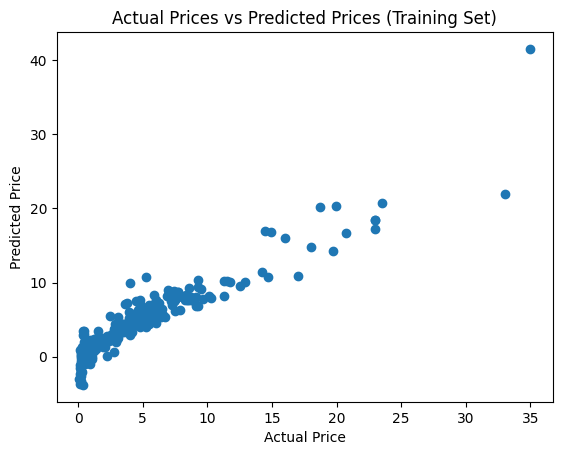

In [45]:
import matplotlib.pyplot as plt

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Training Set)")
plt.show()
